In [172]:
#Code proposé par M.Nataf:Séance 1
import scipy.io as spi
import numpy as np
import matplotlib.pyplot as plt

In [173]:
mat=spi.loadmat("mnist-original.mat")
data=np.transpose(mat['data'])
label=np.array(mat['label']) #label: chiffre numérisé
label=label.astype(int) #Les labels sont stockés en flottants, on les convertit en entiers

Découpe aléatoire de la base de données en base d'apprentissage et base de test

In [174]:
Y,y=data,label[0]
#On change l'ordre des données et des labels avec la même permutation pour que data_test et data_app soient hétérogènes...
def decoupe_aleatoire_base(Y,y):
    m=np.random.permutation((len(y))) #permutation arbitraire
    Y_m=Y[m] #data après permutation
    y_m=y[m] #labels après permutation
    n=len(Y) #nombre d'images dans la base donnée
    n_80=80*n/100 #nombre d'images dans la base d'apprentissage
    n_80=int(n_80)
    data_app=Y_m[:n_80] #base d'apprentissage
    label_app=y_m[:n_80]
    data_test=Y_m[n_80:] #base de tests
    label_test=y_m[n_80:]
    return data_app,label_app,data_test,label_test

Dans la base d'apprentissage, calcul des centoides des chiffres

In [175]:
def calcul_centroides(data_app,label_app):
    X,x=data_app,label_app 
    moy_chiff=[]
    for i in range(10):
        moy=np.mean(X[x==i],axis=0)
        moy_chiff+=[moy]
    return moy_chiff

Méthode d'estimation par rapport à la distance euclidienne

In [176]:
#Définition de la fonction qui estime le chiffre d'un vecteur de la base de tests:
def estim_chiffre_1(v,moy_chiff):
    distances=np.array([np.linalg.norm(v-u) for u in moy_chiff]) #distances entre v et les "chiffres moyens"
    return np.argmin(distances)

Méthode d'estimation par rapport à la "distance" cosine

In [177]:
#On définit la fonction cosine:
def cosine(u,v):
    return np.inner(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

In [178]:
#Fonction qui estime le chiffre d'un vecteur de la base de tests vis a vis de la "distance" cosine:
def estim_chiffre_2(v,moy_chiff):
    distances=np.array([cosine(u,v) for u in moy_chiff]) #distances cosine entre v et les "chiffres moyens"
    return np.argmax(distances) #On prend le max car plus l'angle est petit, plus le cos est grand

Méthode d'estimation par rapport à la norme p

In [179]:
#Fonction qui estime le chiffre d'un vecteur de la base de tests vis a vis de la norme p:
def estim_chiffre_p(p,v,moy_chiff):
    distances=np.array([np.linalg.norm(v-u,p) for u in moy_chiff]) #distances entre v et les "chiffres moyens" en norme p
    return np.argmin(distances)

Fonction qui retourne un vecteur des labels estimés (nouvelle fonction)

In [180]:
#Labels estimés pour les vecteurs de la base de tests et pour une certaine distance:
def estimation_label(data_test,label_test,methode,p,moy_chiff): # renseigner un p quelconque si on n'utilise pas la norme p (par ex p=0)
    k=len(data_test)
    label_estim=np.zeros(k)
        
    if (methode != estim_chiffre_p):      
        for i in range(k):
            label_estim[i]=methode(data_test[i],moy_chiff)
            #print("la précision obtenue est de", np.mean(label_estim==label_test))
            
    else:
        for i in range(k):
            label_estim[i]=methode(p, data_test[i],moy_chiff)
            #print("la précision obtenue pour p={} est de".format(p), np.mean(label_estim==label_test))
        
    return label_estim #  pourcentage de prédictions correctes sur la base de tests.

IDENTIFICATION DES CHIFFRES LES MIEUX OU LES PLUS MAL IDENTIFIES

ANALYSE DU 4 (méthode norme euclidienne)

In [181]:
data_app,label_app,data_test,label_test=decoupe_aleatoire_base(Y,y)
moy_chiff=calcul_centroides(data_app,label_app)

label_estim=estimation_label(data_test,label_test,estim_chiffre_1,0,moy_chiff)
wrong_label=label_test[label_estim!=label_test]
wrong_estim=label_estim[label_estim!=label_test]

label_estim_cos=estimation_label(data_test,label_test,estim_chiffre_2,0,moy_chiff)
wrong_label_cos=label_test[label_estim_cos!=label_test]
wrong_estim_cos=label_estim_cos[label_estim_cos!=label_test]

label_estim_norm3=estimation_label(data_test,label_test,estim_chiffre_p,3,moy_chiff)
wrong_label_norm3=label_test[label_estim_norm3!=label_test]
wrong_estim_norm3=label_estim_norm3[label_estim_norm3!=label_test]

label_estim_norm9=estimation_label(data_test,label_test,estim_chiffre_p,9,moy_chiff)
wrong_label_norm9=label_test[label_estim_norm9!=label_test]
wrong_estim_norm9=label_estim_norm9[label_estim_norm9!=label_test]

Trouvons les chiffres mal attribués à chaque chiffre et tracons le graphe représentant leurs pourcentages

In [182]:
wrong_estimations=[]
wrong_labels=[]
for i in range(10):
    j=wrong_estim[wrong_label==i]
    k=wrong_label[wrong_label==i]
    wrong_estimations.append(j)
    wrong_labels.append(k)

Values=[]
Counts=[]
for i in range(10):
    value, count=np.unique(wrong_estimations[i], return_counts=True)
    value=value.tolist()
    count=count.tolist()
    Values.append(value)
    Counts.append(count)
    
pourcentage_chiffre=np.zeros(10)
for j in range(10):
    if j in Values[0]:
        pourcentage_chiffre[j]=Counts[0][Values[0].index(j)]  
Sum=np.sum(pourcentage_chiffre)
for j in range(10):
    pourcentage_chiffre[j]=pourcentage_chiffre[j]/Sum
    
Liste_pourcentage_chiffres_euc=[]
for i in range(10):
    pourcentage_chiffre=np.zeros(10)
    for j in range(10):
        if j in Values[i]:
            pourcentage_chiffre[j]=Counts[i][Values[i].index(j)]  
    Sum=np.sum(pourcentage_chiffre)
    for j in range(10):
        pourcentage_chiffre[j]=pourcentage_chiffre[j]/Sum
    Liste_pourcentage_chiffres_euc.append(pourcentage_chiffre)

In [183]:
wrong_estimations=[]
wrong_labels=[]
for i in range(10):
    j=wrong_estim_cos[wrong_label_cos==i]
    k=wrong_label_cos[wrong_label_cos==i]
    wrong_estimations.append(j)
    wrong_labels.append(k)

Values=[]
Counts=[]
for i in range(10):
    value, count=np.unique(wrong_estimations[i], return_counts=True)
    value=value.tolist()
    count=count.tolist()
    Values.append(value)
    Counts.append(count)
    
pourcentage_chiffre=np.zeros(10)
for j in range(10):
    if j in Values[0]:
        pourcentage_chiffre[j]=Counts[0][Values[0].index(j)]  
Sum=np.sum(pourcentage_chiffre)
for j in range(10):
    pourcentage_chiffre[j]=pourcentage_chiffre[j]/Sum
    
Liste_pourcentage_chiffres_cos=[]
for i in range(10):
    pourcentage_chiffre=np.zeros(10)
    for j in range(10):
        if j in Values[i]:
            pourcentage_chiffre[j]=Counts[i][Values[i].index(j)]  
    Sum=np.sum(pourcentage_chiffre)
    for j in range(10):
        pourcentage_chiffre[j]=pourcentage_chiffre[j]/Sum
    Liste_pourcentage_chiffres_cos.append(pourcentage_chiffre)

In [184]:
wrong_estimations=[]
wrong_labels=[]
for i in range(10):
    j=wrong_estim_norm3[wrong_label_norm3==i]
    k=wrong_label_norm3[wrong_label_norm3==i]
    wrong_estimations.append(j)
    wrong_labels.append(k)

Values=[]
Counts=[]
for i in range(10):
    value, count=np.unique(wrong_estimations[i], return_counts=True)
    value=value.tolist()
    count=count.tolist()
    Values.append(value)
    Counts.append(count)
    
pourcentage_chiffre=np.zeros(10)
for j in range(10):
    if j in Values[0]:
        pourcentage_chiffre[j]=Counts[0][Values[0].index(j)]  
Sum=np.sum(pourcentage_chiffre)
for j in range(10):
    pourcentage_chiffre[j]=pourcentage_chiffre[j]/Sum
    
Liste_pourcentage_chiffres_norm3=[]
for i in range(10):
    pourcentage_chiffre=np.zeros(10)
    for j in range(10):
        if j in Values[i]:
            pourcentage_chiffre[j]=Counts[i][Values[i].index(j)]  
    Sum=np.sum(pourcentage_chiffre)
    for j in range(10):
        pourcentage_chiffre[j]=pourcentage_chiffre[j]/Sum
    Liste_pourcentage_chiffres_norm3.append(pourcentage_chiffre)

In [185]:
wrong_estimations=[]
wrong_labels=[]
for i in range(10):
    j=wrong_estim_norm9[wrong_label_norm9==i]
    k=wrong_label_norm9[wrong_label_norm9==i]
    wrong_estimations.append(j)
    wrong_labels.append(k)

Values=[]
Counts=[]
for i in range(10):
    value, count=np.unique(wrong_estimations[i], return_counts=True)
    value=value.tolist()
    count=count.tolist()
    Values.append(value)
    Counts.append(count)
    
pourcentage_chiffre=np.zeros(10)
for j in range(10):
    if j in Values[0]:
        pourcentage_chiffre[j]=Counts[0][Values[0].index(j)]  
Sum=np.sum(pourcentage_chiffre)
for j in range(10):
    pourcentage_chiffre[j]=pourcentage_chiffre[j]/Sum
    
Liste_pourcentage_chiffres_norm9=[]
for i in range(10):
    pourcentage_chiffre=np.zeros(10)
    for j in range(10):
        if j in Values[i]:
            pourcentage_chiffre[j]=Counts[i][Values[i].index(j)]  
    Sum=np.sum(pourcentage_chiffre)
    for j in range(10):
        pourcentage_chiffre[j]=pourcentage_chiffre[j]/Sum
    Liste_pourcentage_chiffres_norm9.append(pourcentage_chiffre)

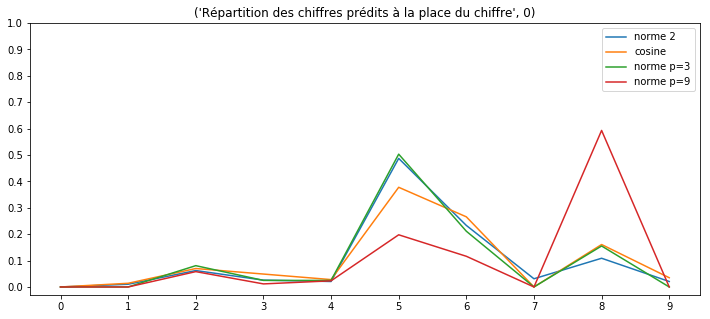

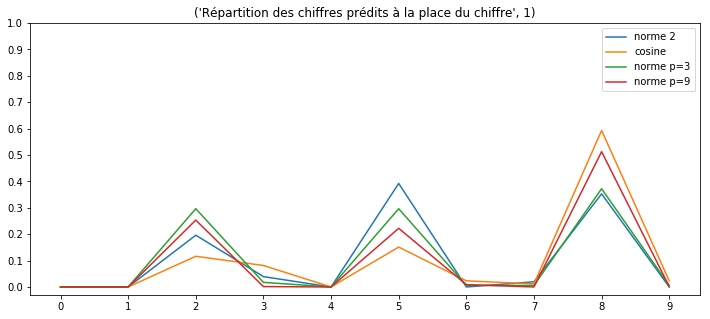

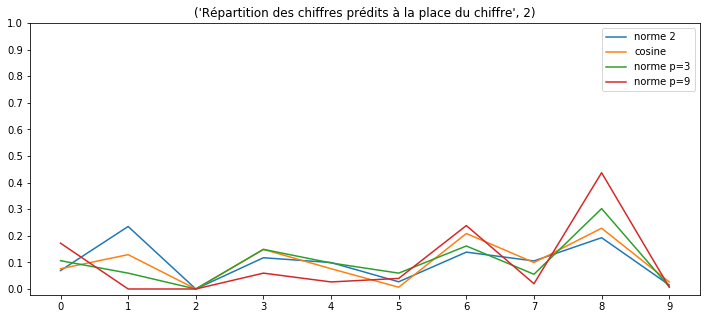

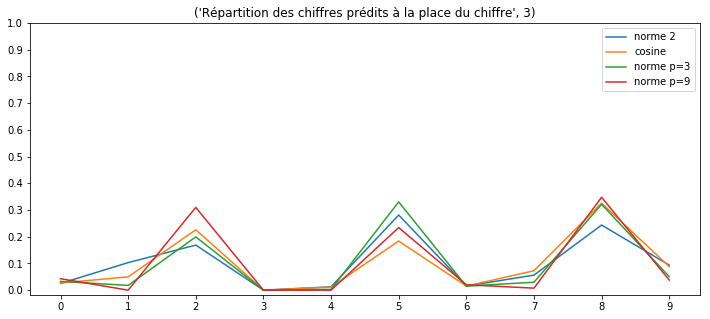

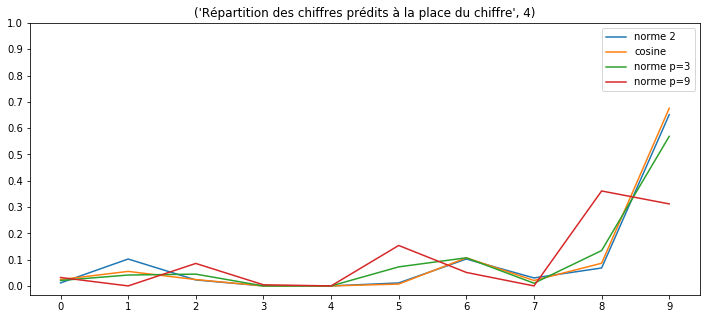

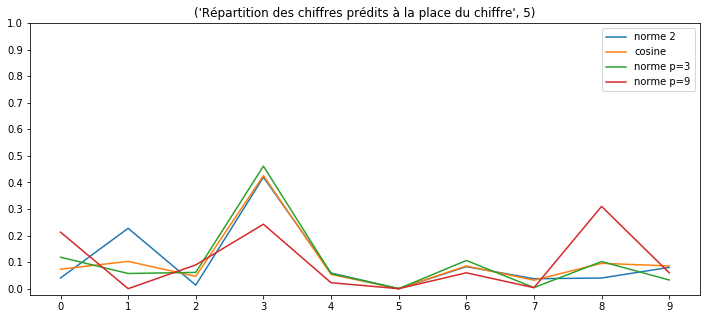

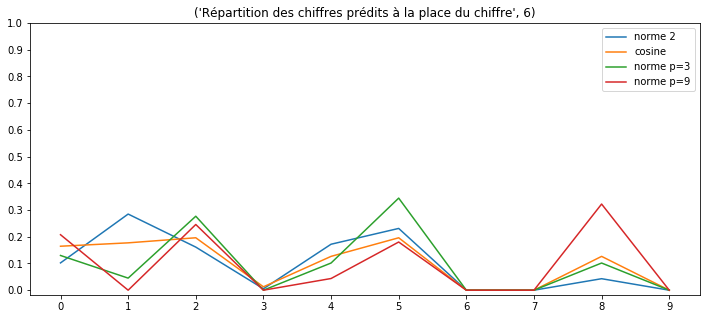

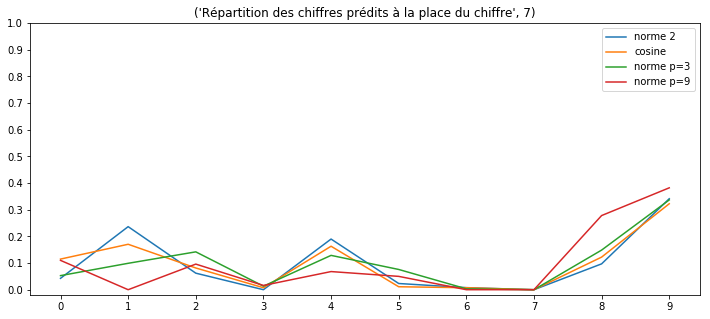

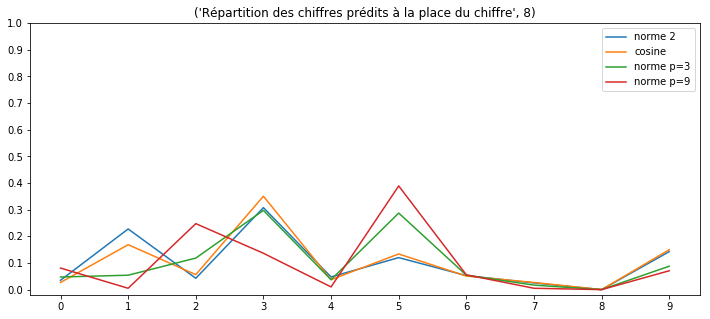

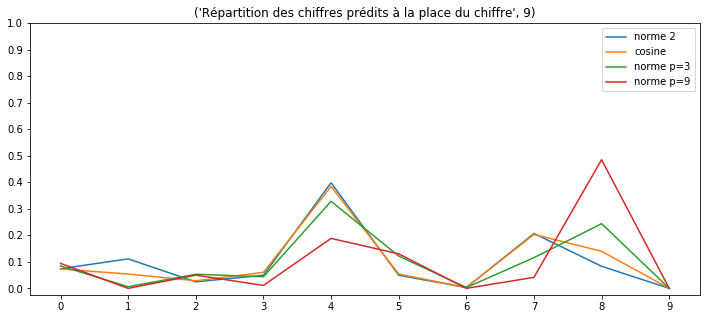

In [186]:
Chiffres=np.arange(0,10,1)

for i in range(10):
    plt.figure(figsize=(12,5))
    str='Répartition des chiffres prédits à la place du chiffre',i
    plt.title(str)
    plt.plot(Chiffres,Liste_pourcentage_chiffres_euc[i],label='norme 2')
    plt.plot(Chiffres,Liste_pourcentage_chiffres_cos[i],label='cosine')
    plt.plot(Chiffres,Liste_pourcentage_chiffres_norm3[i],label='norme p=3')
    plt.plot(Chiffres,Liste_pourcentage_chiffres_norm9[i],label='norme p=9')
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    plt.legend()
    plt.show()